In [70]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [71]:
import pandas as pd
import seaborn as sns
from src.data_processing.processors.guppy_processors.experimental_metadata import ExperimentMetaData, MetaDataFactory
from src.data_processing.processors.guppy_processors.config_loader import ConfigLoader
from src.data_processing.processors.guppy_processors.data_preprocessor import BatchPreprocessor
from src.data_processing.processors.guppy_processors.processing_strategies import ProcessingStrategy, BehaviorProcessingStrategy
from src.data_processing.processors.guppy_processors.aggregators import BehaviorAggregationStrategy, aggregate_data


EXPERIMENTAL_CONFIGS = '/Volumes/fsmresfiles/Basic_Sciences/Phys/Lerner_Lab_tnl2633/Mike/LHA_dopamine/LH_NAC_Headfix_FP/Photometry/Pav_Training/claire_cohort/conf/config.yaml'
configs = ConfigLoader(EXPERIMENTAL_CONFIGS)
meta_data_factory = MetaDataFactory(configs)

In [55]:
behavior_strategy_params={
    'config_key': 'behavioral_events',
    'time_window': (-10, 20),
    'events': (('cue', 'lick'), ('cue', 'encoder'))

}
meta_data_factory = MetaDataFactory(configs)
behavior_strategy = BehaviorProcessingStrategy(**behavior_strategy_params)
batch_preprocessor = BatchPreprocessor(meta_data_factory, behavior_strategy)
batch_preprocessor.process_data(num_processors=8)
files = configs.data_path.rglob('*processed_data.parquet')
aggregate_data(configs, BehaviorAggregationStrategy)

In [17]:
df = pd.read_parquet('/Volumes/fsmresfiles/Basic_Sciences/Phys/Lerner_Lab_tnl2633/Mike/LHA_dopamine/LH_NAC_Headfix_FP/Photometry/Pav_Training/claire_cohort/analyzed_data/aggregated_data/aggregated_behavior_data.parquet').sort_values(by = 'date')


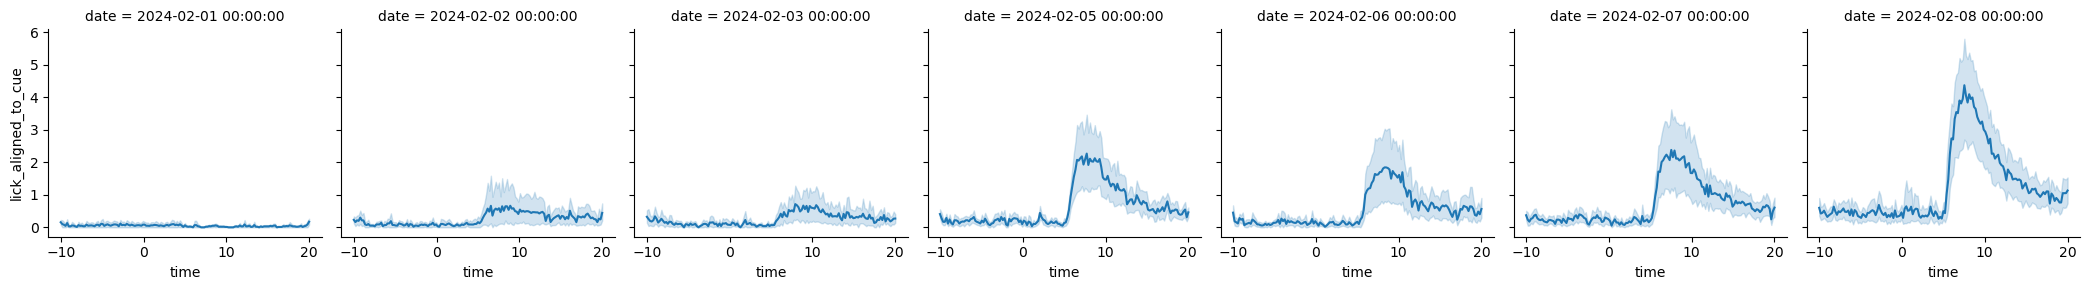

In [103]:
facet = sns.FacetGrid(data=df, col = 'date')
facet.map(sns.lineplot,  "time", "lick_aligned_to_cue")


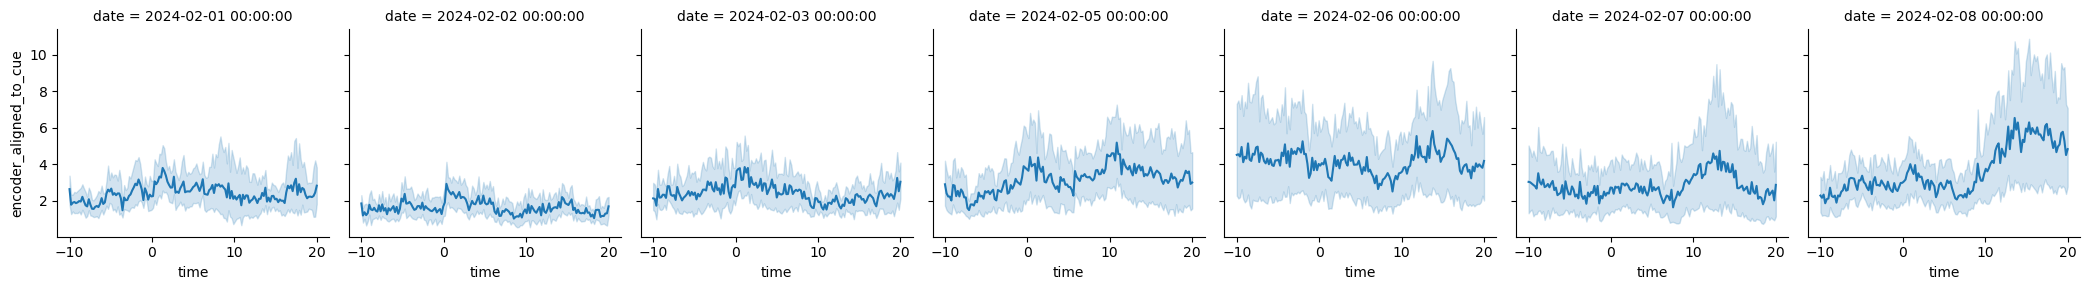

In [23]:
facet = sns.FacetGrid(data=df, col='date')
facet.map(sns.lineplot,  "time", "encoder_aligned_to_cue")

In [89]:
path = '/Volumes/fsmresfiles/Basic_Sciences/Phys/Lerner_Lab_tnl2633/Mike/LHA_dopamine/LH_NAC_Headfix_FP/Photometry/Pav_Training/claire_cohort/analyzed_data/5079-240208-155139'
exp_data = ExperimentMetaData(configs, path)

In [93]:
for f in exp_data.guppy_output_path.iterdir():
    print(f.name)

peak_AUC_lick_LHA_z_score_LHA.csv
reward_LHA_z_score_LHA.h5
peak_AUC_reward_LHA_z_score_LHA.csv
cue_LHA_z_score_LHA.h5
peak_AUC_reward_LHA_z_score_LHA.h5
peak_AUC_cue_LHA_z_score_LHA.csv
cue_NAC.hdf5
465C.hdf5
lick_LHA.hdf5
freqAndAmp_z_score_LHA.h5
reward_NAC.hdf5
lick_LHA_baselineUncorrected_z_score_LHA.h5
405A.hdf5
encoder_LHA_z_score_LHA.h5
peak_AUC_cue_NAC_z_score_NAC.csv
reward_LHA_baselineUncorrected_z_score_LHA.h5
peak_AUC_encoder_NAC_z_score_NAC.h5
peak_AUC_encoder_LHA_z_score_LHA.csv
storesList.csv
cue_NAC_z_score_NAC.h5
lick_NAC.hdf5
encoder_NAC.hdf5
lick_LHA_z_score_LHA.h5
signal_LHA.hdf5
cue_LHA.hdf5
peak_AUC_cue_LHA_z_score_LHA.h5
peak_AUC_encoder_LHA_z_score_LHA.h5
transientsOccurrences_z_score_NAC.csv
cntrl_sig_fit_LHA.hdf5
z_score_LHA.hdf5
Rwrp.hdf5
dff_NAC.hdf5
encoder_LHA.hdf5
timeCorrection_NAC.hdf5
encoder_NAC_z_score_NAC.h5
dff_LHA.hdf5
cue_NAC_baselineUncorrected_z_score_NAC.h5
peak_AUC_cue_NAC_z_score_NAC.h5
control_NAC.hdf5
transientsOccurrences_z_score_LHA.csv

In [101]:
combos = [f"{event}_{structure}_z_score" for event in exp_data.config_data['behavioral_events'].values() for structure in  exp_data.config_data['structures'].values()]
combos

['cue_LHA_z_score',
 'cue_NAC_z_score',
 'lick_LHA_z_score',
 'lick_NAC_z_score',
 'reward_LHA_z_score',
 'reward_NAC_z_score',
 'encoder_LHA_z_score',
 'encoder_NAC_z_score']

In [98]:
exp_data.config_data['structures'].values()

dict_values(['LHA', 'NAC'])